In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ, ClassicalRegister, QuantumRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import matplotlib.pyplot as plt
import numpy as np
import math
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

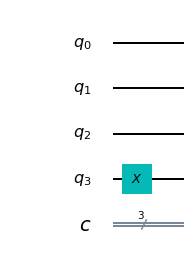

In [2]:
qpe = QuantumCircuit(4, 3)
qpe.x(3)
qpe.draw(output='mpl')

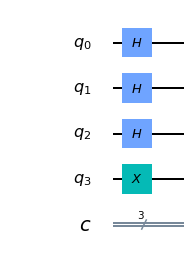

In [3]:
for qubit in range(3):
    qpe.h(qubit)
qpe.draw(output='mpl')

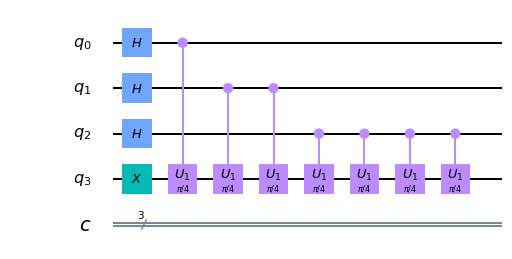

In [4]:
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cu1(math.pi/4, counting_qubit, 3); # This is C-U
    repetitions *= 2
qpe.draw(output='mpl')

In [5]:
def qft_dagger(circ, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        circ.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            circ.cu1(-math.pi/float(2**(j-m)), m, j)
        circ.h(j)

In [6]:
qpe.barrier()
# Apply inverse QFT
qft_dagger(qpe, 3)
# Measure
qpe.barrier()
for n in range(3):
    qpe.measure(n,n)

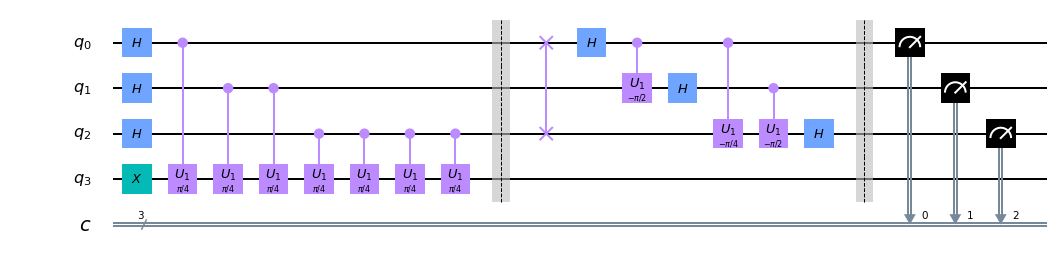

In [7]:
qpe.draw(output="mpl")

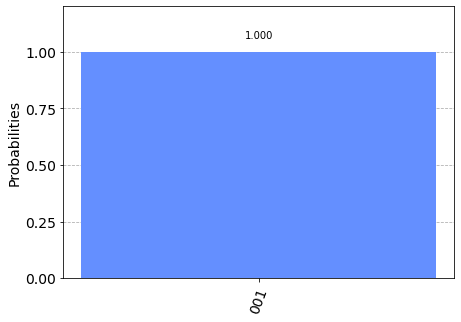

In [8]:
answer = execute(qpe, backend=Aer.get_backend('qasm_simulator'), shots=2048).result().get_counts()
plot_histogram(answer)

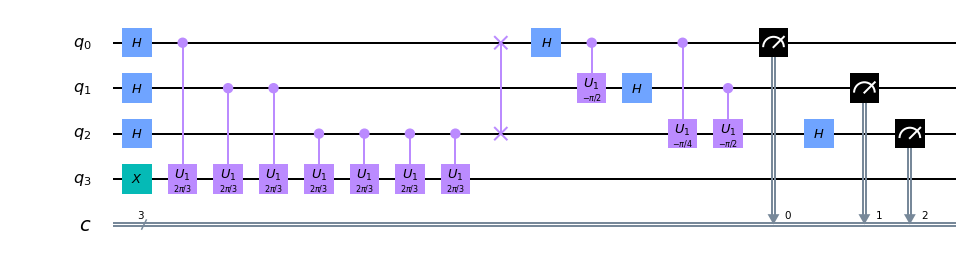

In [9]:
qpe2 = QuantumCircuit(4, 3)

# Apply H-Gates to counting qubits:
for qubit in range(3):
    qpe2.h(qubit)

# Prepare our eigenstate |psi>:
qpe2.x(3)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe2.cu1(angle, counting_qubit, 3);
    repetitions *= 2

# Do the inverse QFT:
qft_dagger(qpe2, 3)

# Measure of course!
for n in range(3):
    qpe2.measure(n,n)

qpe2.draw(output='mpl')

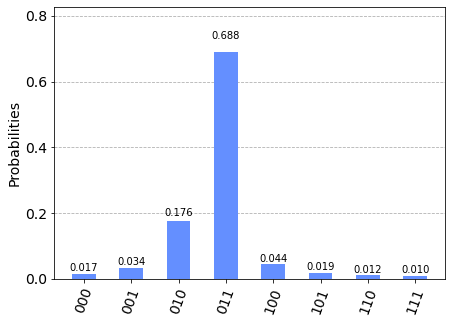

In [10]:
backend = Aer.get_backend('qasm_simulator')
shots = 4096
results = execute(qpe2, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

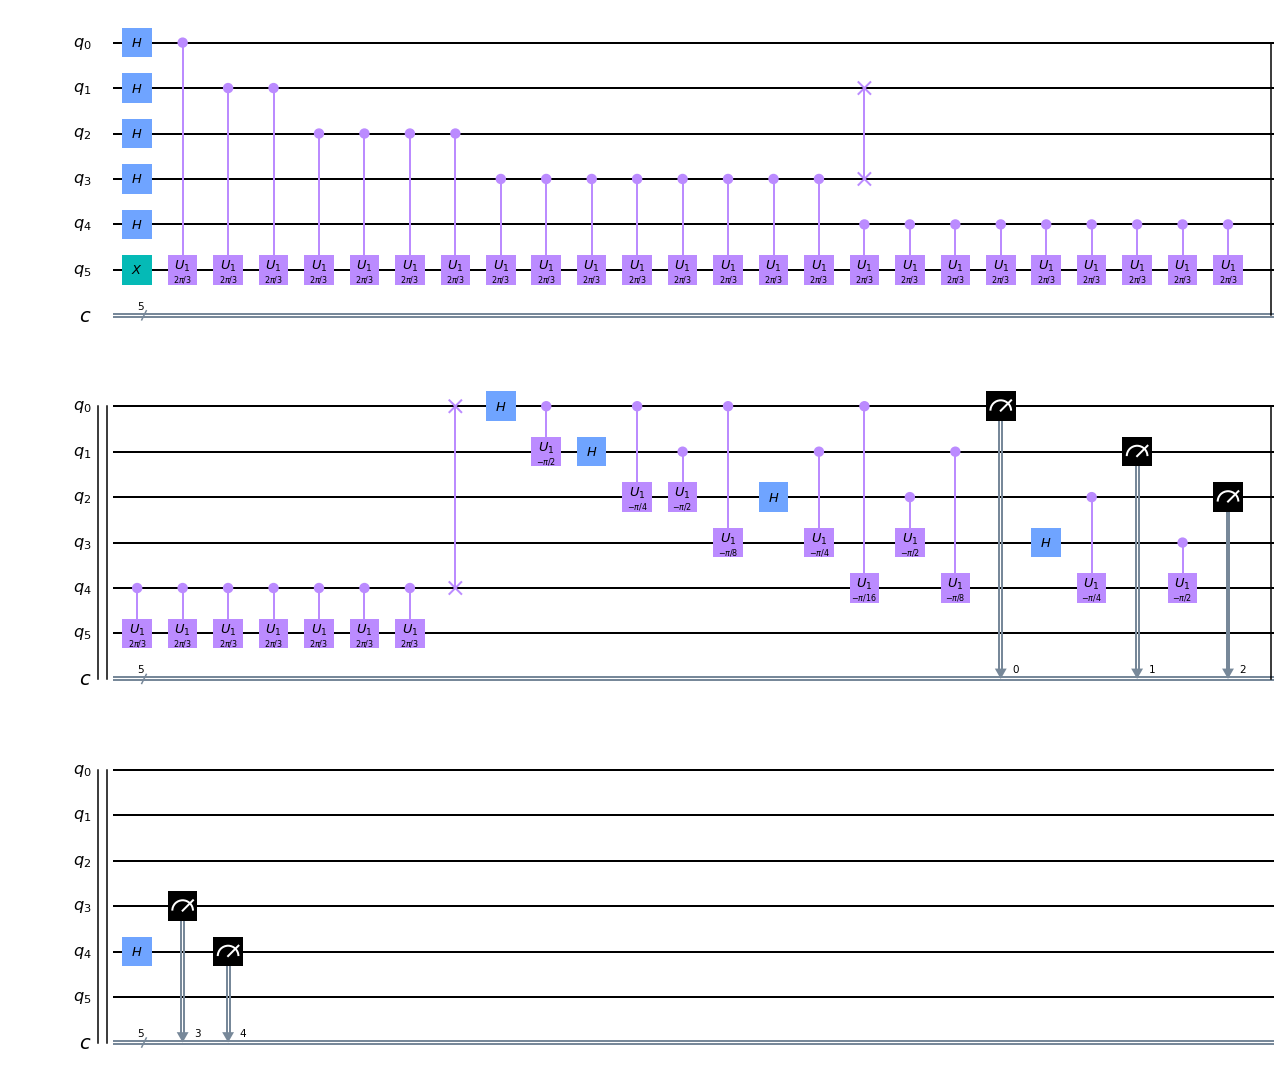

In [11]:
qpe3 = QuantumCircuit(6, 5)

# Apply H-Gates to counting qubits:
for qubit in range(5):
    qpe3.h(qubit)

# Prepare our eigenstate |psi>:
qpe3.x(5)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(5):
    for i in range(repetitions):
        qpe3.cu1(angle, counting_qubit, 5);
    repetitions *= 2

# Do the inverse QFT:
qft_dagger(qpe3, 5)

# Measure of course!
for n in range(5):
    qpe3.measure(n,n)

qpe3.draw(output='mpl')

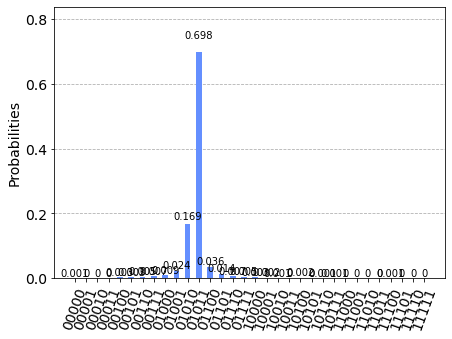

In [12]:
backend = Aer.get_backend('qasm_simulator')
shots = 4096
results = execute(qpe3, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

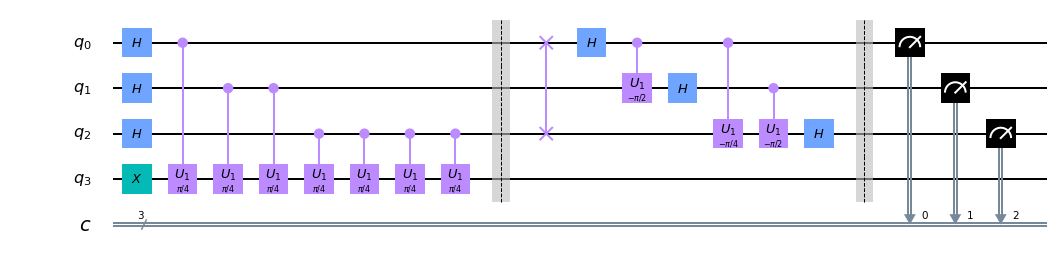

In [13]:
qpe.draw(output='mpl')

In [15]:
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 4 and not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

# Run with 2048 shots
shots = 2048
job = execute(qpe, backend=backend, shots=2048, optimization_level=3)
job_monitor(job)

least busy backend:  ibmq_rome
Job Status: job has successfully run


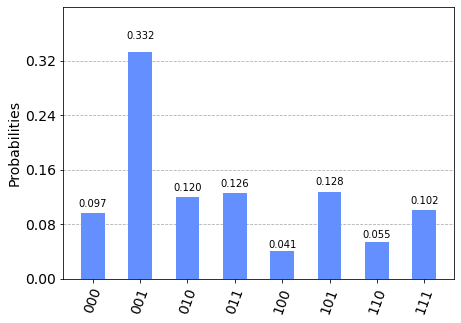

In [16]:
results = job.result()
answer = results.get_counts(qpe)

plot_histogram(answer)